<a href="https://colab.research.google.com/github/paulgureghian/Google_Colab_Notebooks/blob/master/Classifying_in_PyTorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Created by Paul A. Gureghian on 11/26/18.**

**This notebook uses the 'Fashion-MNIST' dataset and**

**PyTorch to classify clothing images.**

In [0]:
### Install CUDA driver
# http://pytorch.org/
from os.path import exists
from wheel.pep425tags import get_abbr_impl, get_impl_ver, get_abi_tag
platform = '{}{}-{}'.format(get_abbr_impl(), get_impl_ver(), get_abi_tag())
cuda_output = !ldconfig -p|grep cudart.so|sed -e 's/.*\.\([0-9]*\)\.\([0-9]*\)$/cu\1\2/'
accelerator = cuda_output[0] if exists('/dev/nvidia0') else 'cpu'

!pip install -q http://download.pytorch.org/whl/{accelerator}/torch-0.4.1-{platform}-linux_x86_64.whl torchvision

In [18]:
### Install PyTorch and Torchvision 
!pip3 install -U -q torchvision 
!pip3 install -U -q http://download.pytorch.org/whl/cu92/torch-0.4.1-cp36-cp36m-linux_x86_64.whl

tcmalloc: large alloc 1073750016 bytes == 0x58646000 @  0x7ff6fce332a4 0x591a07 0x5b5d56 0x502e9a 0x506859 0x502209 0x502f3d 0x506859 0x504c28 0x502540 0x502f3d 0x506859 0x504c28 0x502540 0x502f3d 0x506859 0x504c28 0x502540 0x502f3d 0x507641 0x502209 0x502f3d 0x506859 0x504c28 0x502540 0x502f3d 0x507641 0x504c28 0x502540 0x502f3d 0x507641


In [0]:
### Import packages
import torch
import numpy as np
from torch import nn, optim
import torch.nn.functional as F
import matplotlib.pyplot as plt
from torchvision import  datasets, transforms

In [0]:
### Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,0.5,0.5),(0.5,0.5,0.5))])

In [0]:
### Download and load the training data
trainset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

In [0]:
### ### Download and load the testing data
testset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download=True, train=False, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=True)

In [0]:
### Define a function to view an image and its predicted class
def view_classify(img, ps, version="MNIST"):
    ''' Function for viewing an image and it's predicted classes.
    '''
    ps = ps.data.numpy().squeeze()

    fig, (ax1, ax2) = plt.subplots(figsize=(6,9), ncols=2)
    ax1.imshow(img.resize_(1, 28, 28).numpy().squeeze())
    ax1.axis('off')
    ax2.barh(np.arange(10), ps)
    ax2.set_aspect(0.1)
    ax2.set_yticks(np.arange(10))
    if version == "MNIST":
        ax2.set_yticklabels(np.arange(10))
    elif version == "Fashion":
        ax2.set_yticklabels(['T-shirt/top',
                            'Trouser',
                            'Pullover',
                            'Dress',
                            'Coat',
                            'Sandal',
                            'Shirt',
                            'Sneaker',
                            'Bag',
                            'Ankle Boot'], size='small');
    ax2.set_title('Class Probability')
    ax2.set_xlim(0, 1.1)

    plt.tight_layout()

In [0]:
### Define a function to view the images
def imshow(image, ax=None, title=None, normalize=True):
    """Imshow for Tensor."""
    if ax is None:
        fig, ax = plt.subplots()
    image = image.numpy().transpose((1, 2, 0))

    if normalize:
        mean = np.array([0.485, 0.456, 0.406])
        std = np.array([0.229, 0.224, 0.225])
        image = std * image + mean
        image = np.clip(image, 0, 1)

    ax.imshow(image)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.tick_params(axis='both', length=0)
    ax.set_xticklabels('')
    ax.set_yticklabels('')

    return ax

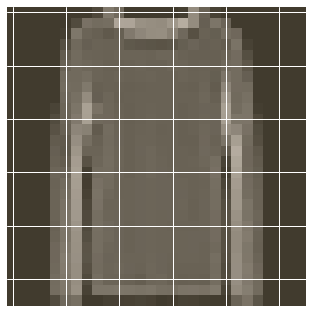

In [25]:
### View one of the images 
images, label = next(iter(trainloader))
imshow(images[0,:]);

**Build the network.**

**Here I will define the network with an input-layer with 784 inputs,**

**Two hidden-layers and an output-layer with 10 outputs.**

**I will use Relu activation functions for the layers.**



In [0]:
### Define the network architecture
class Classifier(nn.Module):
    def __init__(self):
      super().__init__()
      self.input_layer = nn.Linear(784, 256)
      self.hidden_layer1 = nn.Linear(256, 128)
      self.hidden_layer2 = nn.Linear(128, 64)
      self.output_layer = nn.Linear(64, 10)
      
    def forward(self, x):
      x = x.view(x.shape[0], -1)
      x = F.relu(self.input_layer(x))
      x = F.relu(self.hidden_layer1(x))
      x = F.relu(self.hidden_layer2(x))
      x = F.log_softmax(self.output_layer(x), dim=1)
      
      return x    

**Train the network.**

**First I will create the network, then train it.**

**I will define the Loss(), and an optimizer.**

**Finally I will make a forward pass through the network,**

**Calculate the loss, backward pass through the network, update the weights.**

In [0]:
### Create the network 
model = Classifier()
criterion = nn.NLLLoss()
optimizer = optim.SGD(model.parameters(), lr =0.005)

In [28]:
### Train the network 
epochs = 15
for e in range(epochs):
  running_loss = 0
  for images, labels in trainloader:
    log_ps = model(images)
    loss = criterion(log_ps, labels)
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    running_loss += loss.item()
  else:
    print(f"Training loss: {running_loss/len(trainloader)}")

Training loss: 1.8333844058295048
Training loss: 0.8434536845318036
Training loss: 0.6531219607286616
Training loss: 0.5832457157022664
Training loss: 0.5385643497967263
Training loss: 0.5047243087212923
Training loss: 0.4797959850668145
Training loss: 0.4600293350213372
Training loss: 0.4443845237368968
Training loss: 0.4315923212497219
Training loss: 0.42052745676116904
Training loss: 0.41093025798164706
Training loss: 0.40114462188184896
Training loss: 0.3929881645259318
Training loss: 0.3859777594330723


Shape of the class probabilities:  torch.Size([1, 10])

tensor([[8.7041e-09, 9.5376e-09, 3.2007e-10, 5.3036e-08, 1.3025e-10, 1.1979e-03,
         1.9769e-09, 4.2098e-04, 1.9965e-07, 9.9838e-01]],
       grad_fn=<ExpBackward>)



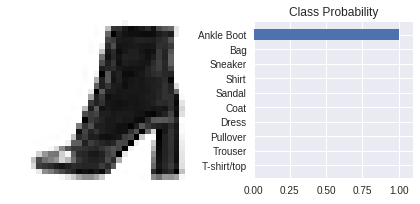

In [31]:
### View an image and its predicted class
dataiter = iter(testloader)
imags, labels = dataiter.next()
img = images[1]

### Calculate class probabilities for the image
ps = torch.exp(model(img)) 
print("Shape of the class probabilities: ", ps.shape)
print('')
print(ps)
print('')

### Plot the image and its probabilities
view_classify(img, ps, version='Fashion') 

**In this section I will use the test set to measure the model's prediction accuracy.**

**The goal is to see how the model reacts to unseen data and its ability to generalize.**

In [0]:
### Do a forward pass with one batch from the test set.
